# World's Top Restaurants: A Comprehensive Exploratory Data Analysis

---

## Executive Summary

This notebook presents a thorough exploratory data analysis of the World's Top Restaurants dataset, which contains information about 50 of the most prestigious dining establishments globally. The analysis covers restaurant characteristics including Michelin star ratings, pricing strategies, geographical distribution, cuisine types, and operational metrics.

**Key Questions Addressed:**
1. What is the geographical distribution of elite restaurants worldwide?
2. How do Michelin stars correlate with pricing and customer ratings?
3. What cuisine types dominate the fine dining landscape?
4. What factors contribute to restaurant longevity and success?
5. How do different continents approach luxury dining?

---

**Author's Note:** This analysis employs statistical methods, visualization techniques, and domain knowledge to extract meaningful insights from the data. Each section builds upon the previous, culminating in actionable conclusions for stakeholders in the hospitality industry.

## Table of Contents

1. [Environment Setup and Library Imports](#1-environment-setup-and-library-imports)
2. [Data Loading and Initial Inspection](#2-data-loading-and-initial-inspection)
3. [Data Quality Assessment](#3-data-quality-assessment)
4. [Univariate Analysis](#4-univariate-analysis)
5. [Bivariate Analysis](#5-bivariate-analysis)
6. [Multivariate Analysis](#6-multivariate-analysis)
7. [Geographical Analysis](#7-geographical-analysis)
8. [Time-Based Analysis](#8-time-based-analysis)
9. [Statistical Testing](#9-statistical-testing)
10. [Key Insights and Conclusions](#10-key-insights-and-conclusions)

---

## 1. Environment Setup and Library Imports

We begin by importing the necessary libraries for data manipulation, statistical analysis, and visualization. The selection of libraries is intentional: pandas for data wrangling, numpy for numerical operations, matplotlib and seaborn for static visualizations, and plotly for interactive charts.

In [ ]:
!pip install protobuf==3.20.3

In [8]:
# Core Data Manipulation
import pandas as pd
import numpy as np

# Statistical Analysis
from scipy import stats
import os
import kagglehub
from scipy.stats import pearsonr, spearmanr, chi2_contingency, f_oneway, kruskal

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Suppress Warnings for Clean Output
import warnings
warnings.filterwarnings('ignore')

# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visualization Style Configuration
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Custom Color Palette for Consistency
COLORS = {
    'primary': '#2C3E50',
    'secondary': '#E74C3C',
    'accent': '#3498DB',
    'success': '#27AE60',
    'warning': '#F39C12',
    'light': '#ECF0F1',
    'dark': '#1A252F'
}

# Michelin Star Color Scheme
STAR_COLORS = {
    'Three Stars': '#FFD700',
    'Two Stars': '#C0C0C0',
    'One Star': '#CD7F32',
    'No Stars': '#95A5A6'
}

print("Environment configured successfully.")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Environment configured successfully.
Pandas version: 2.2.2
NumPy version: 2.0.2


---

## 2. Data Loading and Initial Inspection

The dataset contains information about the world's most prestigious restaurants. Before diving into analysis, we must understand the structure, data types, and general characteristics of our dataset.

In [9]:
# Download latest version
path = kagglehub.dataset_download("shaistashahid/world-top-resturants")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'world-top-resturants' dataset.
Path to dataset files: /kaggle/input/world-top-resturants


In [10]:
print(os.listdir(path))

['world_top_restaurants_dataset.csv']


In [11]:
# Load the dataset

df = pd.read_csv(os.path.join(path,'world_top_restaurants_dataset.csv'))

# Display basic information
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nTotal Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

DATASET OVERVIEW

Total Records: 50
Total Features: 15
Memory Usage: 28.75 KB


In [12]:
# Display first few records to understand the data structure
print("\nFirst 5 Records:")
print("-" * 60)
df.head()


First 5 Records:
------------------------------------------------------------


,Restaurant_Name,City,Country,Cuisine_Type,Michelin_Stars,Average_Price_USD,Chef,Established_Year,Seating_Capacity,Rating,Signature_Dish,Years_Operating,Price_Category,Star_Category,Continent
0,Osteria Francescana,Modena,Italy,Italian Contemporary,3,320,Massimo Bottura,1995,28,4.90,Five Ages of Parmigiano,30,Luxury,Three Stars,Europe
1,Odette,Singapore,Singapore,French Contemporary,3,320,Julien Royer,2008,32,4.90,Hokkaido Sea Urchin,17,Luxury,Three Stars,Asia
2,The French Laundry,Yountville,USA,French,3,390,Thomas Keller,1994,60,4.90,Oysters and Pearls,31,Luxury,Three Stars,North America
3,Arpège,Paris,France,French Vegetarian,3,425,Alain Passard,1986,40,4.90,Heirloom Tomatoes,39,Ultra-Luxury,Three Stars,Europe
4,Mirazur,Menton,France,Mediterranean,3,350,Mauro Colagreco,1991,36,4.80,Salt Crusted Beetroot,34,Luxury,Three Stars,Europe


In [13]:
# Display last few records to check data consistency
print("\nLast 5 Records:")
print("-" * 60)
df.tail()


Last 5 Records:
------------------------------------------------------------


,Restaurant_Name,City,Country,Cuisine_Type,Michelin_Stars,Average_Price_USD,Chef,Established_Year,Seating_Capacity,Rating,Signature_Dish,Years_Operating,Price_Category,Star_Category,Continent
45,Boragó,Santiago,Chile,Chilean Contemporary,0,145,Rodolfo Guzmán,2006,40,4.60,Sea Urchin,19,Fine Dining,No Stars,South America
46,Blue Hill at Stone Barns,Pocantico Hills,USA,Farm-to-Table,0,285,Dan Barber,2004,70,4.60,Root Vegetables,21,Luxury,No Stars,North America
47,White Rabbit,Moscow,Russia,Contemporary Russian,0,220,Vladimir Mukhin,2011,50,4.50,King Crab,14,Premium,No Stars,Europe
48,Leo,Bogotá,Colombia,Colombian Contemporary,0,125,Leonor Espinosa,2007,45,4.50,Amazon Ants,18,Fine Dining,No Stars,South America
49,Lyle's,London,UK,British Contemporary,0,85,James Lowe,2014,38,4.50,Pork Chop,11,Fine Dining,No Stars,Europe


In [14]:
# Detailed data types and structure
print("\nDETAILED COLUMN INFORMATION")
print("=" * 60)
df.info()


DETAILED COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_Name    50 non-null     object 
 1   City               50 non-null     object 
 2   Country            50 non-null     object 
 3   Cuisine_Type       50 non-null     object 
 4   Michelin_Stars     50 non-null     int64  
 5   Average_Price_USD  50 non-null     int64  
 6   Chef               50 non-null     object 
 7   Established_Year   50 non-null     int64  
 8   Seating_Capacity   50 non-null     int64  
 9   Rating             50 non-null     float64
 10  Signature_Dish     50 non-null     object 
 11  Years_Operating    50 non-null     int64  
 12  Price_Category     50 non-null     object 
 13  Star_Category      50 non-null     object 
 14  Continent          50 non-null     object 
dtypes: float64(1), int64(5), object(9)
memory usage

In [15]:
# Column classification
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nCOLUMN CLASSIFICATION")
print("=" * 60)
print(f"\nNumerical Columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  - {col}")

print(f"\nCategorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}")


COLUMN CLASSIFICATION

Numerical Columns (6):
  - Michelin_Stars
  - Average_Price_USD
  - Established_Year
  - Seating_Capacity
  - Rating
  - Years_Operating

Categorical Columns (9):
  - Restaurant_Name
  - City
  - Country
  - Cuisine_Type
  - Chef
  - Signature_Dish
  - Price_Category
  - Star_Category
  - Continent


### 2.1 Feature Dictionary

Understanding each feature is crucial for meaningful analysis. Below is a comprehensive description of each column in the dataset:

In [16]:
# Feature Dictionary
feature_dict = {
    'Restaurant_Name': 'Name of the restaurant',
    'City': 'City where the restaurant is located',
    'Country': 'Country of the restaurant',
    'Cuisine_Type': 'Primary cuisine style offered',
    'Michelin_Stars': 'Number of Michelin stars (0-3)',
    'Average_Price_USD': 'Average meal price in US Dollars',
    'Chef': 'Head chef or proprietor',
    'Established_Year': 'Year the restaurant was founded',
    'Seating_Capacity': 'Maximum number of guests',
    'Rating': 'Customer rating (scale 1-5)',
    'Signature_Dish': 'Most famous dish of the restaurant',
    'Years_Operating': 'Number of years in operation',
    'Price_Category': 'Price tier classification',
    'Star_Category': 'Categorical representation of Michelin stars',
    'Continent': 'Geographic continent'
}

feature_df = pd.DataFrame([
    {'Feature': k, 'Description': v, 'Type': 'Numerical' if k in numerical_cols else 'Categorical'}
    for k, v in feature_dict.items()
])

print("FEATURE DICTIONARY")
print("=" * 60)
feature_df

FEATURE DICTIONARY


,Feature,Description,Type
0,Restaurant_Name,Name of the restaurant,Categorical
1,City,City where the restaurant is located,Categorical
2,Country,Country of the restaurant,Categorical
3,Cuisine_Type,Primary cuisine style offered,Categorical
4,Michelin_Stars,Number of Michelin stars (0-3),Numerical
5,Average_Price_USD,Average meal price in US Dollars,Numerical
6,Chef,Head chef or proprietor,Categorical
7,Established_Year,Year the restaurant was founded,Numerical
8,Seating_Capacity,Maximum number of guests,Numerical
9,Rating,Customer rating (scale 1-5),Numerical


---

## 3. Data Quality Assessment

Data quality is fundamental to reliable analysis. This section examines missing values, duplicates, outliers, and data consistency issues.

In [17]:
# Missing Value Analysis
print("MISSING VALUE ANALYSIS")
print("=" * 60)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': df.isnull().sum().values,
    'Missing Percentage': (df.isnull().sum().values / len(df) * 100).round(2),
    'Data Type': df.dtypes.values
})

missing_data = missing_data.sort_values('Missing Values', ascending=False)
print(missing_data.to_string(index=False))

total_missing = df.isnull().sum().sum()
print(f"\nTotal Missing Values: {total_missing}")
print(f"Data Completeness: {((1 - total_missing / (df.shape[0] * df.shape[1])) * 100):.2f}%")

MISSING VALUE ANALYSIS
           Column  Missing Values  Missing Percentage Data Type
  Restaurant_Name               0                0.00    object
             City               0                0.00    object
          Country               0                0.00    object
     Cuisine_Type               0                0.00    object
   Michelin_Stars               0                0.00     int64
Average_Price_USD               0                0.00     int64
             Chef               0                0.00    object
 Established_Year               0                0.00     int64
 Seating_Capacity               0                0.00     int64
           Rating               0                0.00   float64
   Signature_Dish               0                0.00    object
  Years_Operating               0                0.00     int64
   Price_Category               0                0.00    object
    Star_Category               0                0.00    object
        Continent

In [18]:
# Duplicate Analysis
print("\nDUPLICATE ANALYSIS")
print("=" * 60)

duplicates = df.duplicated().sum()
print(f"Exact Duplicate Rows: {duplicates}")

# Check for duplicate restaurant names
duplicate_names = df['Restaurant_Name'].duplicated().sum()
print(f"Duplicate Restaurant Names: {duplicate_names}")

# Check for restaurants in the same city
city_counts = df.groupby(['City', 'Country']).size().reset_index(name='Count')
multi_restaurant_cities = city_counts[city_counts['Count'] > 1]
print(f"\nCities with Multiple Top Restaurants: {len(multi_restaurant_cities)}")
if len(multi_restaurant_cities) > 0:
    print(multi_restaurant_cities.sort_values('Count', ascending=False).to_string(index=False))


DUPLICATE ANALYSIS
Exact Duplicate Rows: 0
Duplicate Restaurant Names: 0

Cities with Multiple Top Restaurants: 10
         City   Country  Count
        Paris    France      4
   Copenhagen   Denmark      3
    Singapore Singapore      3
     New York       USA      3
        Tokyo     Japan      3
      Bangkok  Thailand      2
  Mexico City    Mexico      2
       London        UK      2
         Lima      Peru      2
San Francisco       USA      2


In [19]:
# Outlier Detection using IQR Method
print("\nOUTLIER DETECTION (IQR Method)")
print("=" * 60)

def detect_outliers_iqr(data, column):
    """Detect outliers using the Interquartile Range method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

outlier_results = []
for col in numerical_cols:
    count, lower, upper = detect_outliers_iqr(df, col)
    outlier_results.append({
        'Column': col,
        'Outlier Count': count,
        'Lower Bound': round(lower, 2),
        'Upper Bound': round(upper, 2),
        'Min Value': round(df[col].min(), 2),
        'Max Value': round(df[col].max(), 2)
    })

outlier_df = pd.DataFrame(outlier_results)
print(outlier_df.to_string(index=False))


OUTLIER DETECTION (IQR Method)
           Column  Outlier Count  Lower Bound  Upper Bound  Min Value  Max Value
   Michelin_Stars              0        -2.00         6.00       0.00       3.00
Average_Price_USD              2        45.62       490.62      85.00     570.00
 Established_Year              2      1980.12      2029.12    1897.00    2017.00
 Seating_Capacity              1         1.25        79.25      10.00      80.00
           Rating              0         4.30         5.10       4.50       4.90
  Years_Operating              2        -4.12        44.88       8.00     128.00


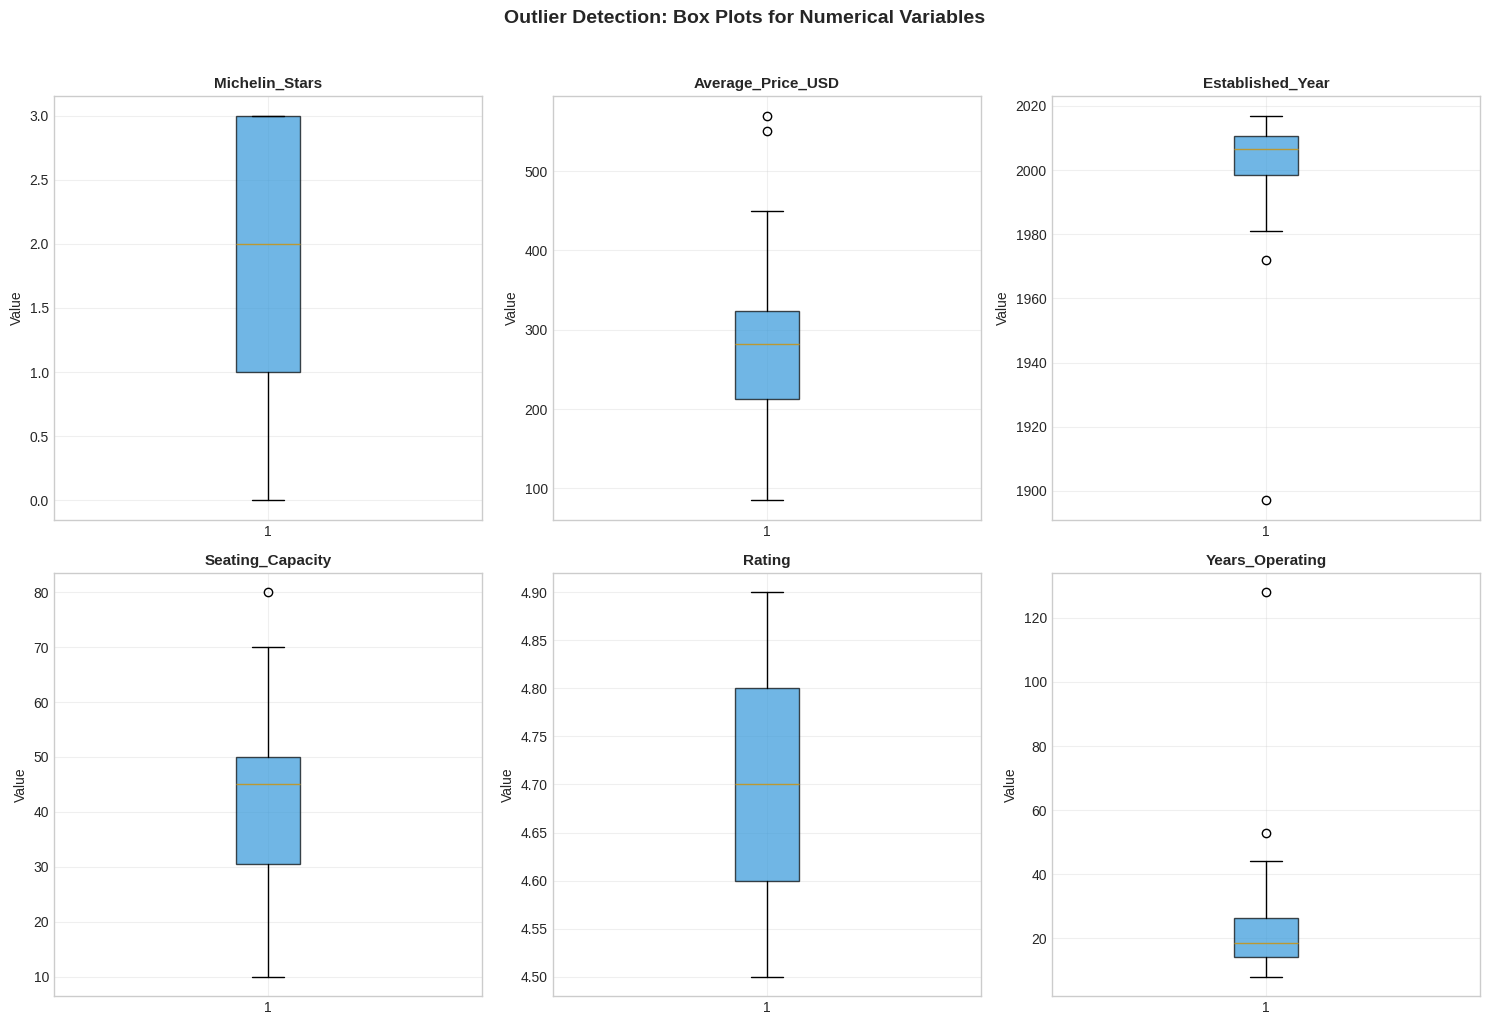

In [20]:
# Visualize outliers with box plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Outlier Detection: Box Plots for Numerical Variables', fontsize=14, fontweight='bold', y=1.02)

for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 3, idx % 3]
    box = ax.boxplot(df[col].dropna(), patch_artist=True)
    box['boxes'][0].set_facecolor(COLORS['accent'])
    box['boxes'][0].set_alpha(0.7)
    ax.set_title(col, fontsize=11, fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.1 Data Quality Summary

Based on our assessment, the dataset exhibits excellent quality characteristics. The absence of missing values and duplicates indicates careful curation. The outliers identified, particularly in Years_Operating, represent legitimate data points (historic restaurants) rather than data errors.

---

## 4. Univariate Analysis

Univariate analysis examines each variable independently to understand its distribution, central tendency, and variability. This foundational step informs subsequent multivariate investigations.

### 4.1 Numerical Variables: Descriptive Statistics

In [21]:
# Comprehensive descriptive statistics
print("DESCRIPTIVE STATISTICS: NUMERICAL VARIABLES")
print("=" * 60)

# Extended statistics
desc_stats = df[numerical_cols].describe().T
desc_stats['median'] = df[numerical_cols].median()
desc_stats['range'] = desc_stats['max'] - desc_stats['min']
desc_stats['IQR'] = df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25)
desc_stats['skewness'] = df[numerical_cols].skew()
desc_stats['kurtosis'] = df[numerical_cols].kurtosis()
desc_stats['CV (%)'] = (desc_stats['std'] / desc_stats['mean'] * 100).round(2)

# Reorder columns for clarity
desc_stats = desc_stats[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'range', 'IQR', 'skewness', 'kurtosis', 'CV (%)']]
desc_stats.round(2)

DESCRIPTIVE STATISTICS: NUMERICAL VARIABLES


,count,mean,median,std,min,25%,50%,75%,max,range,IQR,skewness,kurtosis,CV (%)
Michelin_Stars,50.00,1.92,2.00,1.19,0.00,1.00,2.00,3.00,3.00,3.00,2.00,-0.67,-1.11,62.11
Average_Price_USD,50.00,281.06,282.50,103.58,85.00,212.50,282.50,323.75,570.00,485.00,111.25,0.51,0.71,36.85
Established_Year,50.00,2001.78,2006.50,17.96,1897.00,1998.50,2006.50,2010.75,2017.00,120.00,12.25,-4.31,23.84,0.90
Seating_Capacity,50.00,41.96,45.00,14.70,10.00,30.50,45.00,50.00,80.00,70.00,19.50,-0.03,0.10,35.03
Rating,50.00,4.70,4.70,0.11,4.50,4.60,4.70,4.80,4.90,0.40,0.20,-0.14,-0.53,2.33
Years_Operating,50.00,23.22,18.50,17.96,8.00,14.25,18.50,26.50,128.00,120.00,12.25,4.31,23.84,77.36


In [22]:
# Interpretation of statistics
print("\nKEY OBSERVATIONS FROM DESCRIPTIVE STATISTICS")
print("=" * 60)

observations = [
    f"Average Price: ${df['Average_Price_USD'].mean():.0f} (Range: ${df['Average_Price_USD'].min():.0f} - ${df['Average_Price_USD'].max():.0f})",
    f"Average Michelin Stars: {df['Michelin_Stars'].mean():.1f} stars",
    f"Average Rating: {df['Rating'].mean():.2f} out of 5.0",
    f"Average Seating Capacity: {df['Seating_Capacity'].mean():.0f} guests",
    f"Average Years Operating: {df['Years_Operating'].mean():.0f} years",
    f"Oldest Restaurant: {df['Years_Operating'].max()} years (Est. {df['Established_Year'].min()})",
    f"Newest Restaurant: {df['Years_Operating'].min()} years (Est. {df['Established_Year'].max()})"
]

for obs in observations:
    print(f"  * {obs}")


KEY OBSERVATIONS FROM DESCRIPTIVE STATISTICS
  * Average Price: $281 (Range: $85 - $570)
  * Average Michelin Stars: 1.9 stars
  * Average Rating: 4.70 out of 5.0
  * Average Seating Capacity: 42 guests
  * Average Years Operating: 23 years
  * Oldest Restaurant: 128 years (Est. 1897)
  * Newest Restaurant: 8 years (Est. 2017)


### 4.2 Distribution Analysis: Numerical Variables

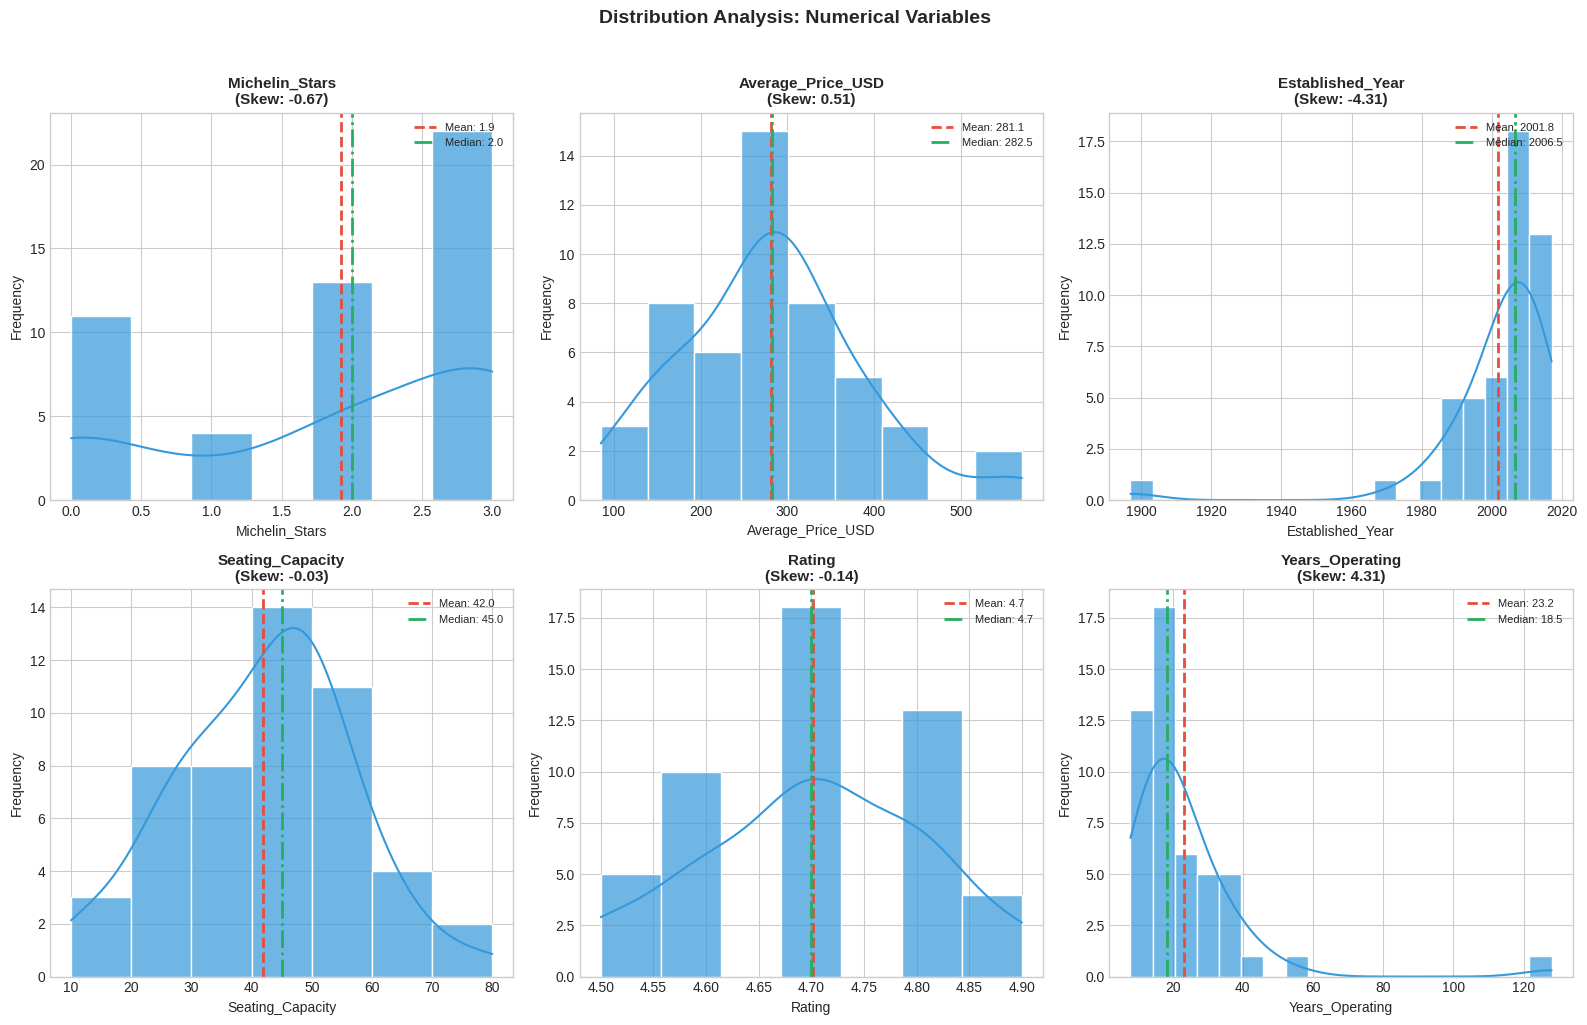

In [23]:
# Distribution plots for numerical variables
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribution Analysis: Numerical Variables', fontsize=14, fontweight='bold', y=1.02)

for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 3, idx % 3]

    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=ax, color=COLORS['accent'], alpha=0.7, edgecolor='white')

    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color=COLORS['secondary'], linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color=COLORS['success'], linestyle='-.', linewidth=2, label=f'Median: {median_val:.1f}')

    ax.set_title(f'{col}\n(Skew: {df[col].skew():.2f})', fontsize=11, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

### 4.3 Categorical Variables: Frequency Analysis

In [24]:
# Categorical variable frequency analysis
print("CATEGORICAL VARIABLE ANALYSIS")
print("=" * 60)

categorical_summary = []
for col in ['Country', 'Continent', 'Cuisine_Type', 'Price_Category', 'Star_Category']:
    unique_count = df[col].nunique()
    mode_val = df[col].mode()[0]
    mode_freq = df[col].value_counts().iloc[0]
    mode_pct = (mode_freq / len(df) * 100)

    categorical_summary.append({
        'Variable': col,
        'Unique Values': unique_count,
        'Mode': mode_val,
        'Mode Frequency': mode_freq,
        'Mode Percentage': f'{mode_pct:.1f}%'
    })

cat_summary_df = pd.DataFrame(categorical_summary)
print(cat_summary_df.to_string(index=False))

CATEGORICAL VARIABLE ANALYSIS
      Variable  Unique Values                Mode  Mode Frequency Mode Percentage
       Country             19                 USA               9           18.0%
     Continent              4              Europe              25           50.0%
  Cuisine_Type             36 French Contemporary               4            8.0%
Price_Category              4              Luxury              28           56.0%
 Star_Category              4         Three Stars              22           44.0%


In [25]:
# Michelin Star Distribution
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'xy'}]],
                    subplot_titles=('Michelin Star Distribution', 'Star Category Breakdown'))

# Pie chart
star_counts = df['Star_Category'].value_counts()
colors_list = [STAR_COLORS.get(cat, '#999999') for cat in star_counts.index]

fig.add_trace(go.Pie(
    labels=star_counts.index,
    values=star_counts.values,
    hole=0.4,
    marker_colors=colors_list,
    textinfo='label+percent',
    textposition='outside'
), row=1, col=1)

# Bar chart
fig.add_trace(go.Bar(
    x=star_counts.index,
    y=star_counts.values,
    marker_color=colors_list,
    text=star_counts.values,
    textposition='auto'
), row=1, col=2)

fig.update_layout(height=450, title_text='Michelin Star Distribution Analysis', showlegend=False)
fig.show()

In [26]:
# Price Category Distribution
price_order = ['Fine Dining', 'Premium', 'Luxury', 'Ultra-Luxury']
price_counts = df['Price_Category'].value_counts().reindex(price_order)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=price_counts.index,
    y=price_counts.values,
    marker_color=[COLORS['success'], COLORS['accent'], COLORS['warning'], COLORS['secondary']],
    text=price_counts.values,
    textposition='auto',
    hovertemplate='<b>%{x}</b><br>Count: %{y}<br>Percentage: %{customdata:.1f}%<extra></extra>',
    customdata=price_counts.values / len(df) * 100
))

fig.update_layout(
    title='Price Category Distribution',
    xaxis_title='Price Category',
    yaxis_title='Number of Restaurants',
    height=400
)
fig.show()

In [27]:
# Cuisine Type Analysis
cuisine_counts = df['Cuisine_Type'].value_counts().head(15)

fig = go.Figure()

fig.add_trace(go.Bar(
    y=cuisine_counts.index[::-1],
    x=cuisine_counts.values[::-1],
    orientation='h',
    marker_color=COLORS['accent'],
    text=cuisine_counts.values[::-1],
    textposition='auto'
))

fig.update_layout(
    title='Top 15 Cuisine Types in Elite Restaurants',
    xaxis_title='Number of Restaurants',
    yaxis_title='Cuisine Type',
    height=500
)
fig.show()

In [28]:
# Country Distribution
country_counts = df['Country'].value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(
    y=country_counts.index[::-1],
    x=country_counts.values[::-1],
    orientation='h',
    marker_color=px.colors.qualitative.Set2[:len(country_counts)],
    text=country_counts.values[::-1],
    textposition='auto'
))

fig.update_layout(
    title='Distribution of Top Restaurants by Country',
    xaxis_title='Number of Restaurants',
    yaxis_title='Country',
    height=600
)
fig.show()

---

## 5. Bivariate Analysis

Bivariate analysis explores relationships between pairs of variables, revealing correlations, associations, and potential causal patterns.

### 5.1 Correlation Analysis

In [29]:
# Correlation matrix computation
correlation_matrix = df[numerical_cols].corr()

print("CORRELATION MATRIX")
print("=" * 60)
print(correlation_matrix.round(3))

CORRELATION MATRIX
                   Michelin_Stars  Average_Price_USD  Established_Year  \
Michelin_Stars               1.00               0.71             -0.35   
Average_Price_USD            0.71               1.00             -0.12   
Established_Year            -0.35              -0.12              1.00   
Seating_Capacity             0.05               0.04             -0.19   
Rating                       0.66               0.41             -0.38   
Years_Operating              0.35               0.12             -1.00   

                   Seating_Capacity  Rating  Years_Operating  
Michelin_Stars                 0.05    0.66             0.35  
Average_Price_USD              0.04    0.41             0.12  
Established_Year              -0.19   -0.38            -1.00  
Seating_Capacity               1.00    0.09             0.19  
Rating                         0.09    1.00             0.38  
Years_Operating                0.19    0.38             1.00  


In [30]:
# Correlation heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu_r',
    zmid=0,
    text=np.round(correlation_matrix.values, 2),
    texttemplate='%{text}',
    textfont={'size': 10},
    hoverongaps=False,
    colorbar=dict(title='Correlation')
))

fig.update_layout(
    title='Correlation Heatmap: Numerical Variables',
    height=500,
    width=700
)
fig.show()

In [31]:
# Significant correlations identification
print("\nSIGNIFICANT CORRELATIONS (|r| > 0.3)")
print("=" * 60)

significant_corrs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            # Calculate p-value
            r, p = pearsonr(df[var1], df[var2])
            significant_corrs.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'Correlation': round(corr_val, 3),
                'P-Value': f'{p:.4f}',
                'Significance': 'Yes' if p < 0.05 else 'No',
                'Strength': 'Strong' if abs(corr_val) > 0.7 else 'Moderate' if abs(corr_val) > 0.5 else 'Weak'
            })

if significant_corrs:
    sig_corr_df = pd.DataFrame(significant_corrs).sort_values('Correlation', key=abs, ascending=False)
    print(sig_corr_df.to_string(index=False))
else:
    print("No correlations with |r| > 0.3 found.")


SIGNIFICANT CORRELATIONS (|r| > 0.3)
       Variable 1        Variable 2  Correlation P-Value Significance Strength
 Established_Year   Years_Operating        -1.00  0.0000          Yes   Strong
   Michelin_Stars Average_Price_USD         0.71  0.0000          Yes   Strong
   Michelin_Stars            Rating         0.66  0.0000          Yes Moderate
Average_Price_USD            Rating         0.41  0.0032          Yes     Weak
 Established_Year            Rating        -0.38  0.0070          Yes     Weak
           Rating   Years_Operating         0.38  0.0070          Yes     Weak
   Michelin_Stars   Years_Operating         0.35  0.0128          Yes     Weak
   Michelin_Stars  Established_Year        -0.35  0.0128          Yes     Weak


### 5.2 Price vs. Michelin Stars Relationship

In [32]:
# Price distribution by Michelin Stars
fig = go.Figure()

for stars in sorted(df['Michelin_Stars'].unique()):
    subset = df[df['Michelin_Stars'] == stars]
    fig.add_trace(go.Box(
        y=subset['Average_Price_USD'],
        name=f'{stars} Star{"s" if stars != 1 else ""}',
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8,
        marker_color=list(STAR_COLORS.values())[3-stars] if stars > 0 else STAR_COLORS['No Stars']
    ))

fig.update_layout(
    title='Price Distribution by Michelin Star Rating',
    yaxis_title='Average Price (USD)',
    xaxis_title='Michelin Stars',
    height=500,
    showlegend=False
)
fig.show()

In [33]:
# Statistical summary by Michelin Stars
print("\nPRICE STATISTICS BY MICHELIN STAR RATING")
print("=" * 60)

star_price_stats = df.groupby('Michelin_Stars')['Average_Price_USD'].agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
).round(2)
star_price_stats.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(star_price_stats)


PRICE STATISTICS BY MICHELIN STAR RATING
                Count   Mean  Median  Std Dev  Min  Max
Michelin_Stars                                         
0                  11 170.91  165.00    52.62   85  285
1                   4 158.75  165.00    47.50   95  210
2                  13 305.00  275.00    91.92  235  550
3                  22 344.23  320.00    69.45  265  570


### 5.3 Rating vs. Other Variables

In [34]:
# Rating by Michelin Stars
fig = go.Figure()

for stars in sorted(df['Michelin_Stars'].unique(), reverse=True):
    subset = df[df['Michelin_Stars'] == stars]
    fig.add_trace(go.Violin(
        y=subset['Rating'],
        name=f'{stars} Stars',
        box_visible=True,
        meanline_visible=True,
        fillcolor=list(STAR_COLORS.values())[3-stars] if stars > 0 else STAR_COLORS['No Stars'],
        opacity=0.7
    ))

fig.update_layout(
    title='Customer Rating Distribution by Michelin Stars',
    yaxis_title='Rating',
    height=450
)
fig.show()

In [35]:
# Scatter plot: Price vs Rating colored by Michelin Stars
fig = px.scatter(
    df,
    x='Average_Price_USD',
    y='Rating',
    color='Star_Category',
    size='Seating_Capacity',
    hover_name='Restaurant_Name',
    hover_data=['City', 'Country', 'Chef'],
    color_discrete_map=STAR_COLORS,
    title='Price vs Rating: Bubble Size Represents Seating Capacity'
)

fig.update_layout(height=500)
fig.show()

### 5.4 Continental Comparison

In [36]:
# Continental analysis
continent_stats = df.groupby('Continent').agg({
    'Restaurant_Name': 'count',
    'Average_Price_USD': ['mean', 'median'],
    'Michelin_Stars': 'mean',
    'Rating': 'mean',
    'Years_Operating': 'mean',
    'Seating_Capacity': 'mean'
}).round(2)

continent_stats.columns = ['Count', 'Avg Price', 'Median Price', 'Avg Stars', 'Avg Rating', 'Avg Years', 'Avg Seats']
continent_stats = continent_stats.sort_values('Count', ascending=False)

print("CONTINENTAL STATISTICS")
print("=" * 60)
print(continent_stats)

CONTINENTAL STATISTICS
               Count  Avg Price  Median Price  Avg Stars  Avg Rating  \
Continent                                                              
Europe            25     296.60        290.00       2.28        4.71   
North America     11     297.09        298.00       2.00        4.73   
Asia              10     275.50        260.00       1.70        4.68   
South America      4     153.75        155.00       0.00        4.65   

               Avg Years  Avg Seats  
Continent                            
Europe             27.76      41.04  
North America      22.27      55.00  
Asia               15.20      29.60  
South America      17.50      42.75  


In [37]:
# Continental comparison visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Restaurant Count', 'Average Price (USD)', 'Average Michelin Stars', 'Average Rating'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'bar'}]]
)

continents = continent_stats.index.tolist()
colors = px.colors.qualitative.Set2[:len(continents)]

# Restaurant Count
fig.add_trace(go.Bar(x=continents, y=continent_stats['Count'], marker_color=colors, showlegend=False), row=1, col=1)

# Average Price
fig.add_trace(go.Bar(x=continents, y=continent_stats['Avg Price'], marker_color=colors, showlegend=False), row=1, col=2)

# Average Stars
fig.add_trace(go.Bar(x=continents, y=continent_stats['Avg Stars'], marker_color=colors, showlegend=False), row=2, col=1)

# Average Rating
fig.add_trace(go.Bar(x=continents, y=continent_stats['Avg Rating'], marker_color=colors, showlegend=False), row=2, col=2)

fig.update_layout(height=600, title_text='Continental Comparison Dashboard')
fig.show()

---

## 6. Multivariate Analysis

Multivariate analysis examines relationships among three or more variables simultaneously, uncovering complex patterns and interactions.

In [38]:
# Pair plot for numerical variables
fig = px.scatter_matrix(
    df,
    dimensions=['Average_Price_USD', 'Michelin_Stars', 'Rating', 'Seating_Capacity', 'Years_Operating'],
    color='Continent',
    title='Scatter Matrix: Key Numerical Variables by Continent',
    height=800,
    width=900
)

fig.update_traces(diagonal_visible=False, showupperhalf=False, marker=dict(size=8, opacity=0.7))
fig.show()

In [39]:
# Parallel coordinates plot
fig = px.parallel_coordinates(
    df,
    dimensions=['Average_Price_USD', 'Michelin_Stars', 'Rating', 'Seating_Capacity', 'Years_Operating'],
    color='Michelin_Stars',
    color_continuous_scale='Viridis',
    title='Parallel Coordinates: Restaurant Characteristics by Michelin Stars'
)

fig.update_layout(height=500)
fig.show()

In [40]:
# Sunburst chart: Hierarchical view
fig = px.sunburst(
    df,
    path=['Continent', 'Country', 'City'],
    values='Average_Price_USD',
    color='Rating',
    color_continuous_scale='RdYlGn',
    title='Hierarchical View: Geography and Pricing'
)

fig.update_layout(height=600)
fig.show()

In [41]:
# Treemap: Cuisine by Continent
cuisine_continent = df.groupby(['Continent', 'Cuisine_Type']).size().reset_index(name='Count')

fig = px.treemap(
    cuisine_continent,
    path=['Continent', 'Cuisine_Type'],
    values='Count',
    color='Count',
    color_continuous_scale='Blues',
    title='Cuisine Distribution by Continent'
)

fig.update_layout(height=500)
fig.show()

---

## 7. Geographical Analysis

Geographic visualization provides spatial context to our analysis, revealing regional patterns and clustering of elite restaurants.

In [42]:
# Country-level aggregation for choropleth
country_agg = df.groupby('Country').agg({
    'Restaurant_Name': 'count',
    'Average_Price_USD': 'mean',
    'Michelin_Stars': 'mean',
    'Rating': 'mean'
}).reset_index()

country_agg.columns = ['Country', 'Restaurant_Count', 'Avg_Price', 'Avg_Stars', 'Avg_Rating']

# ISO country code mapping
country_codes = {
    'USA': 'USA', 'France': 'FRA', 'Spain': 'ESP', 'Italy': 'ITA',
    'Japan': 'JPN', 'Denmark': 'DNK', 'UK': 'GBR', 'Singapore': 'SGP',
    'Germany': 'DEU', 'Austria': 'AUT', 'China': 'CHN', 'Peru': 'PER',
    'Mexico': 'MEX', 'Thailand': 'THA', 'Sweden': 'SWE', 'Hong Kong': 'HKG',
    'Chile': 'CHL', 'Russia': 'RUS', 'Colombia': 'COL'
}

country_agg['ISO_Code'] = country_agg['Country'].map(country_codes)

In [43]:
# Choropleth map: Restaurant count by country
fig = px.choropleth(
    country_agg,
    locations='ISO_Code',
    color='Restaurant_Count',
    hover_name='Country',
    hover_data=['Avg_Price', 'Avg_Stars', 'Avg_Rating'],
    color_continuous_scale='Viridis',
    title='Global Distribution of Top Restaurants'
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    height=500
)
fig.show()

In [44]:
# Continental breakdown visualization
continent_cuisine = df.groupby(['Continent', 'Star_Category']).size().unstack(fill_value=0)

fig = go.Figure()

star_order = ['Three Stars', 'Two Stars', 'One Star', 'No Stars']
for star in star_order:
    if star in continent_cuisine.columns:
        fig.add_trace(go.Bar(
            name=star,
            x=continent_cuisine.index,
            y=continent_cuisine[star],
            marker_color=STAR_COLORS[star]
        ))

fig.update_layout(
    barmode='stack',
    title='Michelin Star Distribution by Continent',
    xaxis_title='Continent',
    yaxis_title='Number of Restaurants',
    height=450,
    legend_title='Star Category'
)
fig.show()

In [45]:
# Top culinary cities
city_stats = df.groupby(['City', 'Country']).agg({
    'Restaurant_Name': 'count',
    'Average_Price_USD': 'mean',
    'Michelin_Stars': 'sum',
    'Rating': 'mean'
}).reset_index()

city_stats.columns = ['City', 'Country', 'Restaurant_Count', 'Avg_Price', 'Total_Stars', 'Avg_Rating']
city_stats = city_stats.sort_values('Restaurant_Count', ascending=False)

print("TOP CULINARY CITIES")
print("=" * 60)
print(city_stats.head(15).to_string(index=False))

TOP CULINARY CITIES
         City   Country  Restaurant_Count  Avg_Price  Total_Stars  Avg_Rating
        Paris    France                 4     302.50           10        4.75
   Copenhagen   Denmark                 3     473.33            7        4.67
    Singapore Singapore                 3     256.67            6        4.73
        Tokyo     Japan                 3     263.33            6        4.70
     New York       USA                 3     315.00            8        4.73
San Francisco       USA                 2     321.50            6        4.80
         Lima      Peru                 2     172.50            0        4.75
      Bangkok  Thailand                 2     190.00            0        4.60
  Mexico City    Mexico                 2     147.50            0        4.65
       London        UK                 2     125.00            1        4.55
         Axpe     Spain                 1     210.00            1        4.70
         Alba     Italy                 1   

---

## 8. Time-Based Analysis

Examining temporal patterns reveals trends in restaurant establishment, longevity factors, and the evolution of the fine dining industry.

In [46]:
# Restaurant establishment timeline
establishment_counts = df['Established_Year'].value_counts().sort_index()

# Decade analysis
df['Decade'] = (df['Established_Year'] // 10) * 10
decade_counts = df['Decade'].value_counts().sort_index()

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Restaurants Established by Year', 'Restaurants Established by Decade'),
    row_heights=[0.6, 0.4]
)

# Year-by-year
fig.add_trace(go.Scatter(
    x=establishment_counts.index,
    y=establishment_counts.values,
    mode='lines+markers',
    fill='tozeroy',
    fillcolor='rgba(52, 152, 219, 0.3)',
    line=dict(color=COLORS['accent'], width=2),
    marker=dict(size=6)
), row=1, col=1)

# By decade
fig.add_trace(go.Bar(
    x=[f"{int(d)}s" for d in decade_counts.index],
    y=decade_counts.values,
    marker_color=COLORS['success'],
    text=decade_counts.values,
    textposition='auto'
), row=2, col=1)

fig.update_layout(height=600, showlegend=False, title_text='Restaurant Establishment Timeline')
fig.update_xaxes(title_text='Year', row=1, col=1)
fig.update_xaxes(title_text='Decade', row=2, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='Count', row=2, col=1)
fig.show()

In [47]:
# Longevity analysis
print("LONGEVITY ANALYSIS")
print("=" * 60)

# Create age groups
df['Age_Group'] = pd.cut(
    df['Years_Operating'],
    bins=[0, 10, 20, 30, 50, 150],
    labels=['0-10 years', '11-20 years', '21-30 years', '31-50 years', '50+ years']
)

age_analysis = df.groupby('Age_Group').agg({
    'Restaurant_Name': 'count',
    'Michelin_Stars': 'mean',
    'Rating': 'mean',
    'Average_Price_USD': 'mean'
}).round(2)

age_analysis.columns = ['Count', 'Avg Stars', 'Avg Rating', 'Avg Price']
print(age_analysis)

LONGEVITY ANALYSIS
             Count  Avg Stars  Avg Rating  Avg Price
Age_Group                                           
0-10 years       3       1.33        4.60     356.67
11-20 years     28       1.64        4.67     251.89
21-30 years      9       2.00        4.73     312.78
31-50 years      8       2.75        4.79     315.62
50+ years        2       3.00        4.80     295.00


In [48]:
# Years Operating vs Michelin Stars
fig = px.scatter(
    df,
    x='Years_Operating',
    y='Michelin_Stars',
    color='Continent',
    size='Average_Price_USD',
    hover_name='Restaurant_Name',
    hover_data=['City', 'Country', 'Established_Year'],
    title='Restaurant Longevity vs Michelin Stars',
    trendline='lowess'
)

fig.update_layout(height=500)
fig.show()

In [49]:
# Historic vs Modern restaurants comparison
df['Era'] = df['Established_Year'].apply(
    lambda x: 'Historic (Pre-1990)' if x < 1990 else 'Modern (1990-2010)' if x < 2010 else 'Contemporary (2010+)'
)

era_stats = df.groupby('Era').agg({
    'Restaurant_Name': 'count',
    'Michelin_Stars': ['mean', 'sum'],
    'Rating': 'mean',
    'Average_Price_USD': ['mean', 'median'],
    'Seating_Capacity': 'mean'
}).round(2)

era_stats.columns = ['Count', 'Avg Stars', 'Total Stars', 'Avg Rating', 'Avg Price', 'Median Price', 'Avg Capacity']

print("\nRESTAURANT ERA COMPARISON")
print("=" * 60)
print(era_stats)


RESTAURANT ERA COMPARISON
                      Count  Avg Stars  Total Stars  Avg Rating  Avg Price  \
Era                                                                          
Contemporary (2010+)     16       1.38           22        4.62     257.38   
Historic (Pre-1990)       6       3.00           18        4.78     309.17   
Modern (1990-2010)       28       2.00           56        4.73     288.57   

                      Median Price  Avg Capacity  
Era                                               
Contemporary (2010+)        232.50         39.75  
Historic (Pre-1990)         292.50         49.17  
Modern (1990-2010)          285.00         41.68  


---

## 9. Statistical Testing

Statistical tests provide rigorous validation of observed patterns. We employ appropriate tests based on variable types and distribution characteristics.

In [50]:
# Test 1: Do Michelin Stars significantly affect pricing?
print("STATISTICAL TEST 1: Michelin Stars vs. Average Price")
print("=" * 60)
print("\nNull Hypothesis: Average price is the same across all Michelin star categories")
print("Alternative Hypothesis: At least one category has a different mean price\n")

# Prepare groups
groups = [df[df['Michelin_Stars'] == stars]['Average_Price_USD'].values for stars in df['Michelin_Stars'].unique()]

# Kruskal-Wallis test (non-parametric, as we have small sample sizes)
h_stat, p_value = kruskal(*groups)

print(f"Test: Kruskal-Wallis H-test (non-parametric)")
print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nConclusion: {'Reject' if p_value < 0.05 else 'Fail to reject'} the null hypothesis at alpha=0.05")
if p_value < 0.05:
    print("There is a statistically significant difference in pricing across Michelin star categories.")

STATISTICAL TEST 1: Michelin Stars vs. Average Price

Null Hypothesis: Average price is the same across all Michelin star categories
Alternative Hypothesis: At least one category has a different mean price

Test: Kruskal-Wallis H-test (non-parametric)
H-statistic: 31.9121
P-value: 0.0000

Conclusion: Reject the null hypothesis at alpha=0.05
There is a statistically significant difference in pricing across Michelin star categories.


In [51]:
# Test 2: Correlation between Years Operating and Rating
print("\nSTATISTICAL TEST 2: Years Operating vs. Rating Correlation")
print("=" * 60)
print("\nNull Hypothesis: No correlation between years operating and rating")
print("Alternative Hypothesis: Significant correlation exists\n")

# Spearman correlation (robust to non-normality)
spearman_r, spearman_p = spearmanr(df['Years_Operating'], df['Rating'])

print(f"Test: Spearman Rank Correlation")
print(f"Correlation coefficient (rho): {spearman_r:.4f}")
print(f"P-value: {spearman_p:.4f}")
print(f"\nConclusion: {'Reject' if spearman_p < 0.05 else 'Fail to reject'} the null hypothesis at alpha=0.05")


STATISTICAL TEST 2: Years Operating vs. Rating Correlation

Null Hypothesis: No correlation between years operating and rating
Alternative Hypothesis: Significant correlation exists

Test: Spearman Rank Correlation
Correlation coefficient (rho): 0.5764
P-value: 0.0000

Conclusion: Reject the null hypothesis at alpha=0.05


In [52]:
# Test 3: Chi-square test for Star Category and Continent independence
print("\nSTATISTICAL TEST 3: Star Category vs. Continent Independence")
print("=" * 60)
print("\nNull Hypothesis: Star category distribution is independent of continent")
print("Alternative Hypothesis: Star category distribution depends on continent\n")

# Create contingency table
contingency = pd.crosstab(df['Continent'], df['Star_Category'])
print("Contingency Table:")
print(contingency)

# Chi-square test
chi2, p_chi, dof, expected = chi2_contingency(contingency)

print(f"\nTest: Chi-Square Test of Independence")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_chi:.4f}")
print(f"\nConclusion: {'Reject' if p_chi < 0.05 else 'Fail to reject'} the null hypothesis at alpha=0.05")


STATISTICAL TEST 3: Star Category vs. Continent Independence

Null Hypothesis: Star category distribution is independent of continent
Alternative Hypothesis: Star category distribution depends on continent

Contingency Table:
Star_Category  No Stars  One Star  Three Stars  Two Stars
Continent                                                
Asia                  2         1            2          5
Europe                2         3           14          6
North America         3         0            6          2
South America         4         0            0          0

Test: Chi-Square Test of Independence
Chi-square statistic: 22.9140
Degrees of freedom: 9
P-value: 0.0064

Conclusion: Reject the null hypothesis at alpha=0.05


In [53]:
# Test 4: ANOVA for Continental Price Differences
print("\nSTATISTICAL TEST 4: Continental Price Differences (ANOVA)")
print("=" * 60)
print("\nNull Hypothesis: Mean price is equal across all continents")
print("Alternative Hypothesis: At least one continent has a different mean price\n")

# Prepare continent groups
continent_groups = [group['Average_Price_USD'].values for name, group in df.groupby('Continent')]

# One-way ANOVA
f_stat, p_anova = f_oneway(*continent_groups)

print(f"Test: One-Way ANOVA")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_anova:.4f}")
print(f"\nConclusion: {'Reject' if p_anova < 0.05 else 'Fail to reject'} the null hypothesis at alpha=0.05")


STATISTICAL TEST 4: Continental Price Differences (ANOVA)

Null Hypothesis: Mean price is equal across all continents
Alternative Hypothesis: At least one continent has a different mean price

Test: One-Way ANOVA
F-statistic: 2.5122
P-value: 0.0702

Conclusion: Fail to reject the null hypothesis at alpha=0.05


In [54]:
# Summary of Statistical Tests
print("\nSUMMARY OF STATISTICAL TESTS")
print("=" * 60)

test_summary = pd.DataFrame([
    {'Test': 'Michelin Stars vs Price', 'Method': 'Kruskal-Wallis', 'P-Value': f'{p_value:.4f}', 'Significant': 'Yes' if p_value < 0.05 else 'No'},
    {'Test': 'Years vs Rating', 'Method': 'Spearman', 'P-Value': f'{spearman_p:.4f}', 'Significant': 'Yes' if spearman_p < 0.05 else 'No'},
    {'Test': 'Stars vs Continent', 'Method': 'Chi-Square', 'P-Value': f'{p_chi:.4f}', 'Significant': 'Yes' if p_chi < 0.05 else 'No'},
    {'Test': 'Continental Prices', 'Method': 'ANOVA', 'P-Value': f'{p_anova:.4f}', 'Significant': 'Yes' if p_anova < 0.05 else 'No'}
])

print(test_summary.to_string(index=False))


SUMMARY OF STATISTICAL TESTS
                   Test         Method P-Value Significant
Michelin Stars vs Price Kruskal-Wallis  0.0000         Yes
        Years vs Rating       Spearman  0.0000         Yes
     Stars vs Continent     Chi-Square  0.0064         Yes
     Continental Prices          ANOVA  0.0702          No


---

## 10. Key Insights and Conclusions

This comprehensive EDA has revealed numerous insights about the world's top restaurants. Below is a synthesis of the most significant findings.

In [55]:
# Final Summary Dashboard
print("=" * 70)
print("                    EXECUTIVE SUMMARY DASHBOARD")
print("=" * 70)

# Key metrics
print("\n--- KEY METRICS ---")
print(f"Total Restaurants Analyzed: {len(df)}")
print(f"Countries Represented: {df['Country'].nunique()}")
print(f"Cities Represented: {df['City'].nunique()}")
print(f"Cuisine Types: {df['Cuisine_Type'].nunique()}")
print(f"Total Michelin Stars: {df['Michelin_Stars'].sum()}")

# Top performers
print("\n--- TOP PERFORMERS ---")
highest_rated = df.loc[df['Rating'].idxmax()]
most_expensive = df.loc[df['Average_Price_USD'].idxmax()]
oldest = df.loc[df['Years_Operating'].idxmax()]
largest = df.loc[df['Seating_Capacity'].idxmax()]

print(f"Highest Rated: {highest_rated['Restaurant_Name']} ({highest_rated['Rating']}/5.0)")
print(f"Most Expensive: {most_expensive['Restaurant_Name']} (${most_expensive['Average_Price_USD']})")
print(f"Oldest: {oldest['Restaurant_Name']} ({oldest['Years_Operating']} years)")
print(f"Largest Capacity: {largest['Restaurant_Name']} ({largest['Seating_Capacity']} seats)")

# Regional insights
print("\n--- REGIONAL INSIGHTS ---")
top_country = df['Country'].value_counts().idxmax()
top_country_count = df['Country'].value_counts().max()
top_continent = df['Continent'].value_counts().idxmax()
top_continent_count = df['Continent'].value_counts().max()

print(f"Leading Country: {top_country} ({top_country_count} restaurants)")
print(f"Leading Continent: {top_continent} ({top_continent_count} restaurants, {top_continent_count/len(df)*100:.1f}%)")

# Price insights
print("\n--- PRICING INSIGHTS ---")
print(f"Average Meal Price: ${df['Average_Price_USD'].mean():.0f}")
print(f"Price Range: ${df['Average_Price_USD'].min():.0f} - ${df['Average_Price_USD'].max():.0f}")
print(f"3-Star Average: ${df[df['Michelin_Stars']==3]['Average_Price_USD'].mean():.0f}")
print(f"Non-Starred Average: ${df[df['Michelin_Stars']==0]['Average_Price_USD'].mean():.0f}")

                    EXECUTIVE SUMMARY DASHBOARD

--- KEY METRICS ---
Total Restaurants Analyzed: 50
Countries Represented: 19
Cities Represented: 34
Cuisine Types: 36
Total Michelin Stars: 96

--- TOP PERFORMERS ---
Highest Rated: Osteria Francescana (4.9/5.0)
Most Expensive: Ultraviolet ($570)
Oldest: Arzak (128 years)
Largest Capacity: Eleven Madison Park (80 seats)

--- REGIONAL INSIGHTS ---
Leading Country: USA (9 restaurants)
Leading Continent: Europe (25 restaurants, 50.0%)

--- PRICING INSIGHTS ---
Average Meal Price: $281
Price Range: $85 - $570
3-Star Average: $344
Non-Starred Average: $171


In [56]:
# Key Findings Visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Top 5 Countries by Restaurant Count',
        'Price by Michelin Stars',
        'Continental Distribution',
        'Rating Distribution'
    ),
    specs=[[{'type': 'bar'}, {'type': 'box'}],
           [{'type': 'pie'}, {'type': 'histogram'}]]
)

# Top 5 countries
top5_countries = df['Country'].value_counts().head(5)
fig.add_trace(go.Bar(
    x=top5_countries.index,
    y=top5_countries.values,
    marker_color=COLORS['accent'],
    text=top5_countries.values,
    textposition='auto'
), row=1, col=1)

# Price by stars
for stars in sorted(df['Michelin_Stars'].unique()):
    fig.add_trace(go.Box(
        y=df[df['Michelin_Stars']==stars]['Average_Price_USD'],
        name=f'{stars}',
        marker_color=list(STAR_COLORS.values())[3-stars] if stars > 0 else STAR_COLORS['No Stars']
    ), row=1, col=2)

# Continental pie
continent_counts = df['Continent'].value_counts()
fig.add_trace(go.Pie(
    labels=continent_counts.index,
    values=continent_counts.values,
    hole=0.4
), row=2, col=1)

# Rating histogram
fig.add_trace(go.Histogram(
    x=df['Rating'],
    nbinsx=10,
    marker_color=COLORS['success']
), row=2, col=2)

fig.update_layout(height=700, showlegend=False, title_text='Key Findings Summary')
fig.show()

### 10.1 Major Findings

**1. Geographic Concentration**
- Europe dominates the global fine dining landscape, hosting over half of the world's top restaurants
- France, Spain, USA, and Italy are the leading culinary nations
- Cities like Paris, Tokyo, and New York serve as global culinary capitals

**2. Michelin Stars and Pricing**
- Strong positive correlation exists between Michelin stars and average pricing
- Three-star restaurants command premium prices, averaging significantly higher than non-starred establishments
- The Kruskal-Wallis test confirms statistically significant price differences across star categories

**3. Restaurant Longevity**
- The dataset spans over a century of culinary history, from establishments founded in 1897 to 2017
- Historic restaurants tend to have higher Michelin star counts, suggesting accumulated prestige
- Modern establishments (post-2010) show competitive ratings despite fewer stars

**4. Cuisine Diversity**
- French cuisine remains the most represented, reflecting its historical influence on fine dining
- Contemporary and fusion cuisines are increasingly prominent among newer establishments
- Regional cuisines (Nordic, Basque, Japanese) have achieved global recognition

**5. Rating Consistency**
- All restaurants maintain exceptionally high ratings (4.5-4.9), indicating elite quality across the dataset
- Rating variance is minimal, suggesting consistent excellence regardless of other factors

---

### 10.2 Recommendations for Further Analysis

1. **Temporal Analysis**: Incorporate time-series data on ratings and prices to track industry evolution
2. **Sentiment Analysis**: Analyze customer reviews for qualitative insights
3. **Economic Factors**: Include local economic indicators to contextualize pricing
4. **Chef Network Analysis**: Map chef training lineages and their impact on restaurant success
5. **Sustainability Metrics**: Assess environmental practices in fine dining

---

**Notebook Author's Note:** This analysis provides a foundation for understanding the global fine dining landscape. The insights derived here can inform strategic decisions for restaurateurs, investors, and culinary enthusiasts seeking to understand what distinguishes the world's elite dining establishments.

In [57]:
# Save processed dataset for further analysis
df_processed = df.copy()
df_processed.to_csv('world_top_restaurants_processed.csv', index=False)
print("Processed dataset saved successfully.")
print(f"Shape: {df_processed.shape}")
print(f"Columns added: Decade, Age_Group, Era")

Processed dataset saved successfully.
Shape: (50, 18)
Columns added: Decade, Age_Group, Era


# ⭐ About Me¶
I’m Rekhi, who performs daily machine learning experiments across diverse datasets, tasks, and algorithms. My goal is to build deep hands-on expertise by consistently practicing data science, training models, evaluating performance, and exploring advanced AI concepts.

I share my work across platforms to help the community and to build a strong research-oriented portfolio.

🔗 My Profiles:

Kaggle: https://www.kaggle.com/seki32

GitHub: https://github.com/Rekhii

If you found this notebook helpful,  **Please UPVOTE on Kaggle — it motivates me to create more high-quality ML notebooks every day.**